In [1]:
# Imports
# End-to-end example: https://www.tensorflow.org/lite/models/modify/model_maker/image_classification
import os

import numpy as np

import tensorflow as tf
assert tf.__version__.startswith('2')

from tflite_model_maker import model_spec
from tflite_model_maker import image_classifier
from tflite_model_maker.config import ExportFormat
from tflite_model_maker.config import QuantizationConfig
from tflite_model_maker.image_classifier import DataLoader

import matplotlib.pyplot as plt

2023-04-28 08:29:26.643187: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/oscar/Repositories/rescuemaze-2023/maze_ws/devel/lib:/home/oscar/testLidar/devel/lib:/opt/ros/noetic/lib
2023-04-28 08:29:26.643223: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
/home/oscar/.local/lib/python3.8/site-packages/tensorflow_addons/utils/ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.9.0 and strictly below 2.12.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.8.4 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you

In [7]:
data = DataLoader.from_folder("dataset4")

INFO:tensorflow:Load image with size: 527, num_label: 4, labels: F.class, H.class, S.class, U.class.


INFO:tensorflow:Load image with size: 527, num_label: 4, labels: F.class, H.class, S.class, U.class.


In [8]:
train_data, rest_data = data.split(0.8)
validation_data, test_data = rest_data.split(0.5)

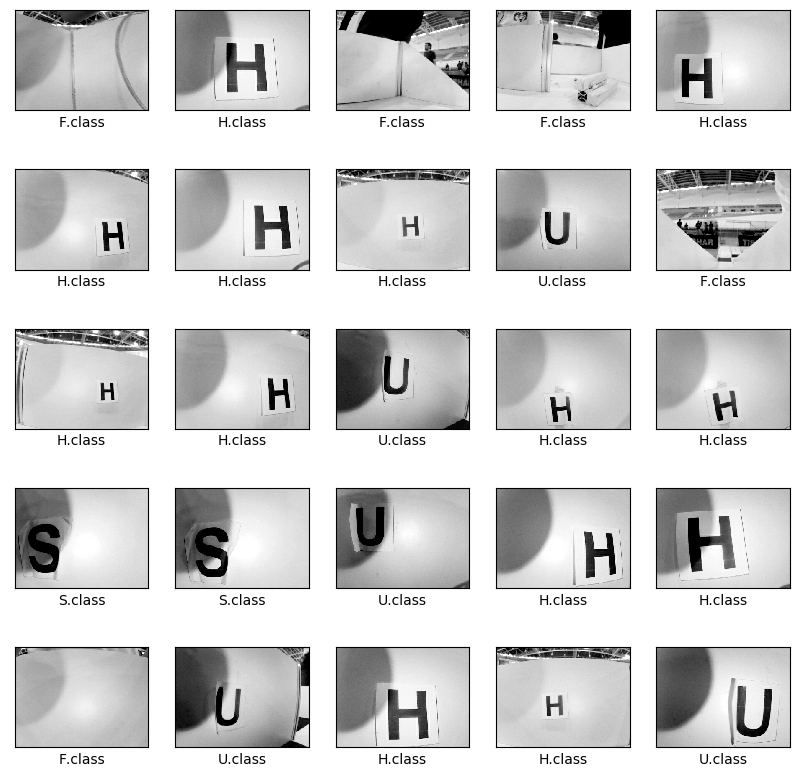

In [9]:
# Show 25 images from the dataset
plt.figure(figsize=(10,10))
for i, (image, label) in enumerate(data.gen_dataset().unbatch().take(25)):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.numpy(), cmap=plt.cm.gray)
  plt.xlabel(data.index_to_label[label.numpy()])
plt.show()

In [11]:
model = image_classifier.create(train_data, validation_data=validation_data)

INFO:tensorflow:Retraining the models...


INFO:tensorflow:Retraining the models...


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hub_keras_layer_v1v2 (HubKe  (None, 1280)             3413024   
 rasLayerV1V2)                                                   
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 4)                 5124      
                                                                 
Total params: 3,418,148
Trainable params: 5,124
Non-trainable params: 3,413,024
_________________________________________________________________
None
Epoch 1/5


2023-04-28 08:36:38.922746: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 19267584 exceeds 10% of free system memory.
2023-04-28 08:36:39.028456: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 19267584 exceeds 10% of free system memory.
2023-04-28 08:36:39.186568: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 51380224 exceeds 10% of free system memory.
2023-04-28 08:36:39.676547: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 19267584 exceeds 10% of free system memory.
2023-04-28 08:36:40.464566: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 19267584 exceeds 10% of free system memory.


13/13 [==============================] - 25s 1s/step - loss: 1.1176 - accuracy: 0.5625 - val_loss: 0.6809 - val_accuracy: 0.8491
Epoch 2/5
13/13 [==============================] - 19s 1s/step - loss: 0.5206 - accuracy: 0.9471 - val_loss: 0.4721 - val_accuracy: 1.0000
Epoch 3/5
13/13 [==============================] - 18s 1s/step - loss: 0.4416 - accuracy: 0.9976 - val_loss: 0.4500 - val_accuracy: 0.9811
Epoch 4/5
13/13 [==============================] - 19s 1s/step - loss: 0.4313 - accuracy: 0.9904 - val_loss: 0.4210 - val_accuracy: 1.0000
Epoch 5/5
13/13 [==============================] - 18s 1s/step - loss: 0.4207 - accuracy: 0.9952 - val_loss: 0.4239 - val_accuracy: 0.9811


In [12]:
loss, accuracy = model.evaluate(test_data)

2/2 [==============================] - 2s 705ms/step - loss: 0.4071 - accuracy: 1.0000


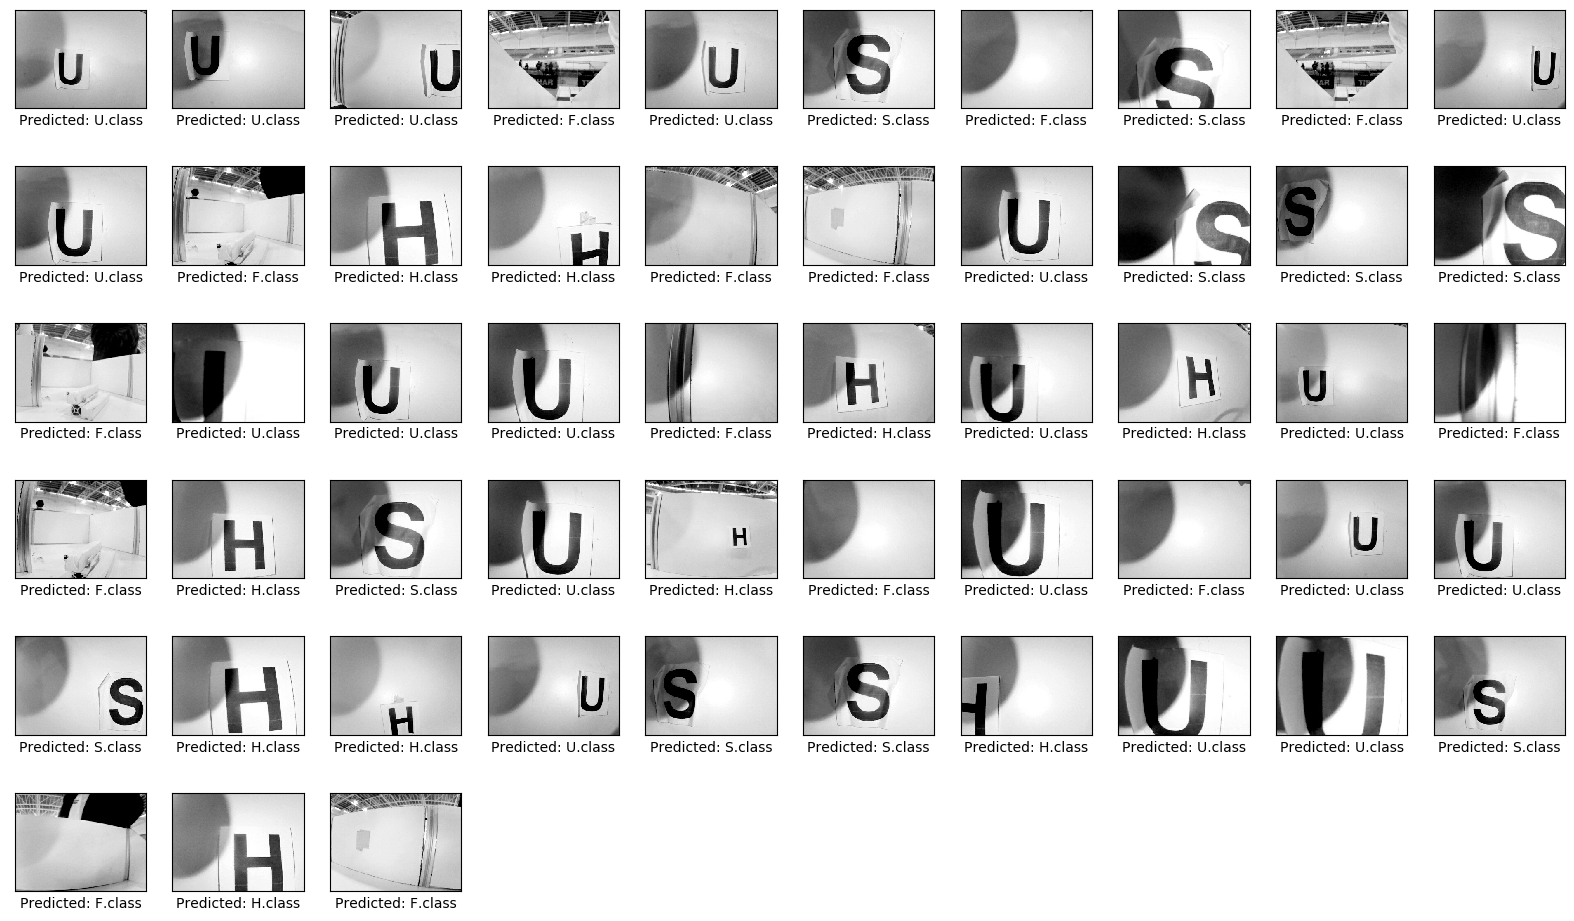

In [13]:
# Plot results for the test dataset

# A helper function that returns 'red'/'black' depending on if its two input
# parameter matches or not.
def get_label_color(val1, val2):
  if val1 == val2:
    return 'black'
  else:
    return 'red'

# Then plot 100 test images and their predicted labels.
# If a prediction result is different from the label provided label in "test"
# dataset, we will highlight it in red color.
plt.figure(figsize=(20, 20))
predicts = model.predict_top_k(test_data)
for i, (image, label) in enumerate(test_data.gen_dataset().unbatch().take(100)):
  ax = plt.subplot(10, 10, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.numpy(), cmap=plt.cm.gray)

  predict_label = predicts[i][0][0]
  color = get_label_color(predict_label,
                          test_data.index_to_label[label.numpy()])
  ax.xaxis.label.set_color(color)
  plt.xlabel('Predicted: %s' % predict_label)
plt.show()

In [14]:
model.export(export_dir=".")

2023-04-28 08:38:52.003378: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: /tmp/tmpana71ymv/assets


INFO:tensorflow:Assets written to: /tmp/tmpana71ymv/assets
2023-04-28 08:38:59.763661: I tensorflow/core/grappler/devices.cc:66] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 0
2023-04-28 08:38:59.763820: I tensorflow/core/grappler/clusters/single_machine.cc:358] Starting new session
2023-04-28 08:38:59.914332: I tensorflow/core/grappler/optimizers/meta_optimizer.cc:1164] Optimization results for grappler item: graph_to_optimize
  function_optimizer: Graph size after: 913 nodes (656), 923 edges (664), time = 47.041ms.
  function_optimizer: function_optimizer did nothing. time = 0.013ms.

/home/oscar/.local/lib/python3.8/site-packages/tensorflow/lite/python/convert.py:746: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn("Statistics for quantized inputs were expected, but not "
2023-04-28 08:39:01.670950: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:357] Ignored output_format.

INFO:tensorflow:Label file is inside the TFLite model with metadata.


fully_quantize: 0, inference_type: 6, input_inference_type: 3, output_inference_type: 3
INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Saving labels in /tmp/tmpjfcqqq9p/labels.txt


INFO:tensorflow:Saving labels in /tmp/tmpjfcqqq9p/labels.txt


INFO:tensorflow:TensorFlow Lite model exported successfully: ./model.tflite


INFO:tensorflow:TensorFlow Lite model exported successfully: ./model.tflite


In [15]:
# Evaluate the tflite model (may perform worse than model without export)  
model.evaluate_tflite('model.tflite', test_data)

{'accuracy': 1.0}